In [6]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import os 

root = Path(".")

In [ ]:
# width of each peak
# height of each peak
# position of each peak
# noise function parameters
# number of peaks

# 512 points

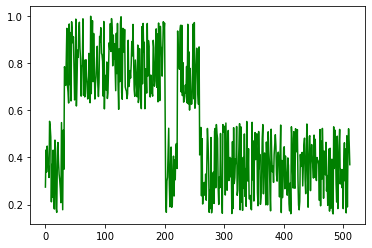

In [183]:
def rsquare(elem):
    square = np.zeros(elem)
    low = np.random.randint(elem)
    high = np.random.randint(low, elem)
    if high > elem:
        high = elem
    for elem in range(low, high):
        square[elem] = 1
    square = np.random.rand()*square
    return square

def remove_overlap(elem, squares_list):
    if len(squares_list) == 0:
        return np.zeros(elem)
    summed_squares = np.sum(squares_list, axis=0)
    nonzero = np.where(summed_squares!=0)
    summed_squares[nonzero] = 1
    return summed_squares
    
def rnoise(elem):
    noise = np.random.random(elem)*np.random.rand()
    noise = noise + np.random.rand()
    return noise

def renvelope(elem):
    linear = np.array([i for i in range(elem)])[::-1]
    return np.random.rand()*linear*1e-4

def compose(elem):
    square = remove_overlap(elem, [rsquare(elem) for _ in range(np.random.randint(0,5))])
    if np.random.rand() >= .62:
        square = square*0
    noise = rnoise(elem)
    envelope = renvelope(elem)
    p = False
    if np.max(square+noise) > np.std(noise)*3+np.mean(noise):
        p = True
    signal = noise+square+envelope
    signal = signal/np.max(signal)
    return p, signal

label, signal = compose(512)
c='green' if label else 'red'
plt.plot(signal, color=c)

In [100]:
savedir = root / "output" / "training_data"
for i in range(100000):
    label, signal = compose(512)
#     label, _ = compose(512)
    labeldir = "positives" if label else "negatives"
#     if label:
#         pos += 1
#     else:
#         neg += 1
    np.savetxt(str(root / "output" / "training_data" / labeldir / '%07d.txt')%i, signal, fmt='%f')
    if i%1000==0:
        print("%06d"%i, end='\r')
        


In [62]:
np.random.randint(0,5)

4

In [ ]:
np.random.randint(5)